<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h1 style="color: #A2AAAD; margin: 50px auto 0; font-size: 60px;">Data Analysis</h1>
    <p style="color: #A2AAAD; margin: 0px; font-size: 20px;">Federated Deep Reinforced Learning to enable CH Selection in a IoV</p>
    <p style="color: #A2AAAD; margin: 0px auto 50px; font-size: 20px;">Chandler Scott</p>
</div>

<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 50px auto;">Convert .sca file to a .csv</h3>
</div>

In [338]:
import os
sca_file = 'sim-results.sca'
output_file = 'Results_8-24.csv'
windows_scavetool = '~/omnetpp/bin/opp_scavetool'
results_filepath = '~/src/iov_sim/examples/iov_sim/results'

run_command = lambda: \
    f'wsl {windows_scavetool} x {results_filepath}/{sca_file} -o {results_filepath}/{output_file}' \
    if os.name == 'nt' else f'{windows_scavetool} x  {results_filepath}/{sca_file} -o {results_filepath}/{output_file}'

!{run_command()}

Exported 1082570 scalars, 194903 parameters


<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 50px auto;">Read .csv into Pandas dataframe and clean data</h3>
</div>

In [339]:
import pandas as pd

csv_file = f'{results_filepath}/Results_8-24.csv'
df = pd.read_csv(csv_file, low_memory=False)


scalar_df = df.loc[(df['type'] == 'scalar'), ['name', 'module', 'value']]
filtered_df = df[df['name'].str.match(r'^\w+:\d+$') & df['name'].notna()]
filtered_df = filtered_df[["module", "name", "value"]]

filtered_df['timestamp'] = filtered_df['name'].str.extract(r'(\d+)').astype(int)
filtered_df['name'] = filtered_df['name'].str.split(':').str[0]

df = filtered_df.pivot(index=['module', 'timestamp'], columns='name', values='value').reset_index()



df = df[~((df['rcvdPackets'].astype(float) == 0) | 
                          (df['sentPackets'].astype(float) == 0) | 
                          (df['totalClusters'] == "0") |
                          (df['connectivity'].astype(float) < 0.1) |
                          (df['avgPacketDelivery'].astype(float) > 100) |
                          (df['percentLifetimeInCluster'].astype(float) > 100) |
                          (df['avgClusterLifetime'] == "0"))]


df


name,module,timestamp,avgClusterLifetime,avgPacketDelay,avgPacketDelivery,clusterHead,clustersLeftHealthCheck,clustersLeftNoReply,connectivity,electionsInitiated,electionsRefused,percentLifetimeInCluster,percentLifetimeInElection,rcvdPackets,sentPackets,timeAlive,totalClusters
306,Scenario.node[1008].appl,600,2,0.29104744203323,100,0,3,5,0.2123897707231,5,18,40,62.60085914269,1,1,10,2
649,Scenario.node[1019].appl,640,3.573726971389,0.29105837148791,66.666666666667,0,1,9,0.33333333333333,6,18,35.73726971389,31.904280601881,2,3,10,1
682,Scenario.node[101].appl,350,6,0.29111178798757,100,0,4,16,0.13854057369561,13,51,60,30,1,1,10,1
1081,Scenario.node[102].appl,160,6,0.31702505000908,100,0,2,6,0.19166666666667,6,10,60,30,1,1,10,1
1085,Scenario.node[102].appl,200,7.018645175769,0.30401150701209,100,0,3,8,0.225,7,12,70.18645175769,30,1,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64740,Scenario.node[967].appl,610,6,0.29145149301257,50,0,3,7,0.16678571428571,8,8,60,30,1,2,10,1
64852,Scenario.node[970].appl,620,6,0.29112403092313,50,0,1,3,0.54575757575758,1,21,60,30.377842982721,1,2,10,1
65857,Scenario.node[998].appl,680,6,0.29111194703546,50,1,4,13,0.10992192018508,6,23,60,47.41804486565,1,2,10,1
65956,Scenario.node[99].appl,470,2,0.29116953197672,100,0,1,23,0.1652859503003,11,28,40,61.91548639677,1,1,10,2


In [340]:
# Packet delivery
packet_delivery_min = df["avgPacketDelivery"].astype(float).min()
packet_delivery_max = df["avgPacketDelivery"].astype(float).max()
packet_delivery_mean = df["avgPacketDelivery"].astype(float).mean()

# Packet delay
packet_delay_min = df["avgPacketDelay"].astype(float).min()
packet_delay_max = df["avgPacketDelay"].astype(float).max()
packet_delay_mean = df["avgPacketDelay"].astype(float).mean()

# cluster lifetime
cluster_lifetime_min = df["avgClusterLifetime"].astype(float).min()
cluster_lifetime_max = df["avgClusterLifetime"].astype(float).max()
cluster_lifetime_mean = df["avgClusterLifetime"].astype(float).mean()

# percent of lifetime clustered
percent_clustered_min = df["percentLifetimeInCluster"].astype(float).min()
percent_clustered_max = df["percentLifetimeInCluster"].astype(float).max()
percent_clustered_mean = df["percentLifetimeInCluster"].astype(float).mean()

# time alive
time_alive_min = df["timeAlive"].astype(float).min()
time_alive_max = df["timeAlive"].astype(float).max()
time_alive_mean = df["timeAlive"].astype(float).mean()

# total clusters
total_clusters_min = df["totalClusters"].astype(float).min()
total_clusters_max = df["totalClusters"].astype(float).max()
total_clusters_mean = df["totalClusters"].astype(float).mean()

# clusters left no reply
clusters_left_no_reply_min = df["clustersLeftNoReply"].astype(float).min()
clusters_left_no_reply_max = df["clustersLeftNoReply"].astype(float).max()
clusters_left_no_reply_mean = df["clustersLeftNoReply"].astype(float).mean()

# clusters left healthcheck
clusters_left_healthcheck_min = df["clustersLeftHealthCheck"].astype(float).min()
clusters_left_healthcheck_max = df["clustersLeftHealthCheck"].astype(float).max()
clusters_left_healthcheck_mean = df["clustersLeftHealthCheck"].astype(float).mean()

# connectivity
df['connectivity'] = df['connectivity'].astype(float) * 100;
connectivity_min = df["connectivity"].astype(float).min()
connectivity_max = df["connectivity"].astype(float).max()
connectivity_mean = df["connectivity"].astype(float).mean()

results = (
f'Packet Delivery %:\nmin:\t{packet_delivery_min}\nmax:\t{packet_delivery_max}\nmean:\t{packet_delivery_mean}\n' 
f'\nPacket Delay:\nmin:\t{packet_delay_min}\nmax:\t{packet_delay_max}\nmean:\t{packet_delay_mean}\n' 
f'\nAverage Cluster Lifetime:\nmin:\t{cluster_lifetime_min}\nmax:\t{cluster_lifetime_max}\nmean:\t{cluster_lifetime_mean}\n' 
f'\n% Lifetime in Cluster:\nmin:\t{percent_clustered_min}\nmax:\t{percent_clustered_max}\nmean:\t{percent_clustered_mean}\n' 
f'\nTime Alive:\nmin:\t{time_alive_min}\nmax:\t{time_alive_max}\nmean:\t{time_alive_mean}\n' 
f'\nTotal # of Clusters:\nmin:\t{total_clusters_min}\nmax:\t{total_clusters_max}\nmean:\t{total_clusters_mean}\n' 
f'\nClusters Left No Reply:\nmin:\t{clusters_left_no_reply_min}\nmax:\t{clusters_left_no_reply_max}\nmean:\t{clusters_left_no_reply_mean}\n' 
f'\nClusters Left Healthcheck:\nmin:\t{clusters_left_healthcheck_min}\nmax:\t{clusters_left_healthcheck_max}\nmean:\t{clusters_left_healthcheck_mean}\n' 
f'\nConnectivity:\nmin:\t{connectivity_min}\nmax:\t{connectivity_max}\nmean:\t{connectivity_mean}\n' 
)


#print(trimmed_df['rcvdPackets'])
print(results)


Packet Delivery %:
min:	25.0
max:	100.0
mean:	73.8732282210543

Packet Delay:
min:	0.29100960898631
max:	0.57016048708647
mean:	0.29729716164139225

Average Cluster Lifetime:
min:	0.36456106166202
max:	10.0
mean:	4.983493876865595

% Lifetime in Cluster:
min:	3.6456106166202
max:	100.0
mean:	53.39768825531297

Time Alive:
min:	10.0
max:	10.0
mean:	10.0

Total # of Clusters:
min:	1.0
max:	2.0
mean:	1.157190635451505

Clusters Left No Reply:
min:	0.0
max:	36.0
mean:	10.093645484949834

Clusters Left Healthcheck:
min:	0.0
max:	14.0
mean:	3.0936454849498327

Connectivity:
min:	10.005103066868
max:	69.94949494949499
mean:	17.175582340833746



<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 50px auto;">Plot charts from dataframe</h3>
</div>

3.25


/home/chandler/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/chandler/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


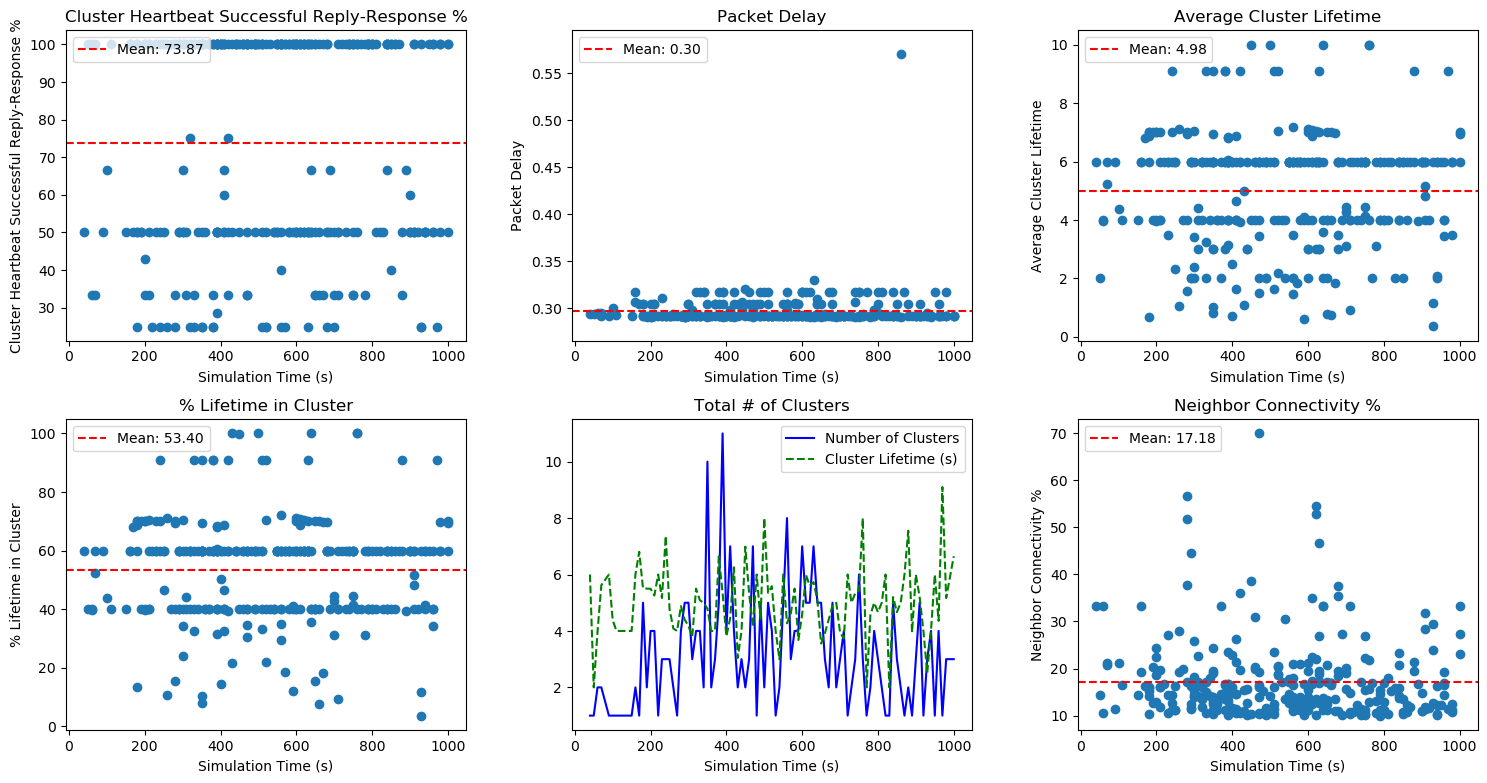

In [442]:
import matplotlib.pyplot as plt
import numpy as np


def display_line_charts():
    # Metrics names for the x-axis labels
    metrics = ['Cluster Heartbeat Successful Reply-Response %', 'Packet Delay', 'Average Cluster Lifetime', 
                '% Lifetime in Cluster', 'Total # of Clusters', "Neighbor Connectivity %"]

    # Columns in the DataFrame for each metric
    columns = ['avgPacketDelivery', 'avgPacketDelay', 'avgClusterLifetime', 
                'percentLifetimeInCluster', 'totalClusters', "connectivity"]
    
    for c in columns:
        df[c] = df[c].astype(float)

    n_cols = int(len(columns)/2)

    fig, ax = plt.subplots(ncols=n_cols, nrows=2, figsize=(15, 8))

    i = 0
    

    for column, ax in zip(columns, ax.ravel()):
        if i != len(columns)-2:            
            ax.scatter(x=df['timestamp'], y=df[column], color='tab:blue')
            mean_value = df[column].mean()
            ax.axhline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
            ax.set_title(column.upper())
            ax.set_title(metrics[i])
            ax.set_xlabel("Simulation Time (s)")
            ax.set_ylabel(metrics[i])
            ax.legend(loc="upper left")


        else:
            total_clusters_count = df.groupby('timestamp')['totalClusters'].count()
            avg_clusterlifetime = df.groupby('timestamp')['avgClusterLifetime'].mean()

            print(total_clusters_count.mean())

            ax.plot(total_clusters_count.index, total_clusters_count.values, color='b', linestyle='-', label="Number of Clusters")
            ax.plot(avg_clusterlifetime.index, avg_clusterlifetime.values, color='g', linestyle='--', label="Cluster Lifetime (s)")
            ax.set_title(column.upper())
            ax.set_title(metrics[i])
            ax.set_xlabel("Simulation Time (s)")

            ax.legend()


        i+=1

        
    plt.tight_layout()
    plt.show()



def display_bar_charts():
    # Metrics names for the x-axis labels
    metrics = ['Cluster Heartbeat Successful Reply-Response %', 'Packet Delay', 'Average Cluster Lifetime', 
            '% Lifetime in Cluster', 'Total # of Clusters', "Neighbor Connectivity %"]

    # Columns in the DataFrame for each metric
    columns = ['avgPacketDelivery', 'avgClusterLifetime', 
             "connectivity"]

    # Create subplots with two rows and three columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Create histograms for each metric
    for i, ax in enumerate(axes.flat):
        values = df[columns[i]].astype(float)
        ax.hist(values, bins=15, edgecolor='black')
        
        # Calculate and plot the mean as a vertical line
        mean_value = values.mean()
        ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        
        ax.set_title(metrics[i])
        ax.set_xlabel(metrics[i])
        ax.set_ylabel('Occurrences')
        ax.legend(loc='upper right')

    # Adjust layout
    plt.tight_layout()

    # Display the plots
    plt.show()

def display_cluster_leaving():
    ## CLUSTER LEAVING STATS ##
    # clusters left no reply
    clusters_left_no_reply_min = df["clustersLeftNoReply"].astype(float).min()
    clusters_left_no_reply_max = df["clustersLeftNoReply"].astype(float).max()
    clusters_left_no_reply_mean = df["clustersLeftNoReply"].astype(float).mean()

    # clusters left healthcheck
    clusters_left_healthcheck_min = df["clustersLeftHealthCheck"].astype(float).min()
    clusters_left_healthcheck_max = df["clustersLeftHealthCheck"].astype(float).max()
    clusters_left_healthcheck_mean = df["clustersLeftHealthCheck"].astype(float).mean()

    # Create a subplot for clusters left no reply and health check
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.35
    ind = np.arange(3)

    # Plot bars for clusters left no reply
    clusters_left_no_reply_values = [clusters_left_no_reply_min, clusters_left_no_reply_max, clusters_left_no_reply_mean]
    rect1 = ax.bar(ind, clusters_left_no_reply_values, bar_width, label='Clusters Left from No Reply')

    # Plot bars for clusters left health check
    clusters_left_healthcheck_values = [clusters_left_healthcheck_min, clusters_left_healthcheck_max, clusters_left_healthcheck_mean]
    rect2 = ax.bar(ind + bar_width, clusters_left_healthcheck_values, bar_width, label='Clusters Left from Health Check')

    # Add values on top of the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rect1)
    autolabel(rect2)

    ax.set_title('Reason for Leaving Cluster')
    ax.set_xticks(ind + bar_width / 2)
    ax.set_xticklabels(['Min', 'Max', 'Mean'])
    ax.set_ylabel('Count')
    ax.legend()

    plt.tight_layout()
    plt.show()


#display_bar_charts()
display_line_charts()
#display_cluster_leaving()

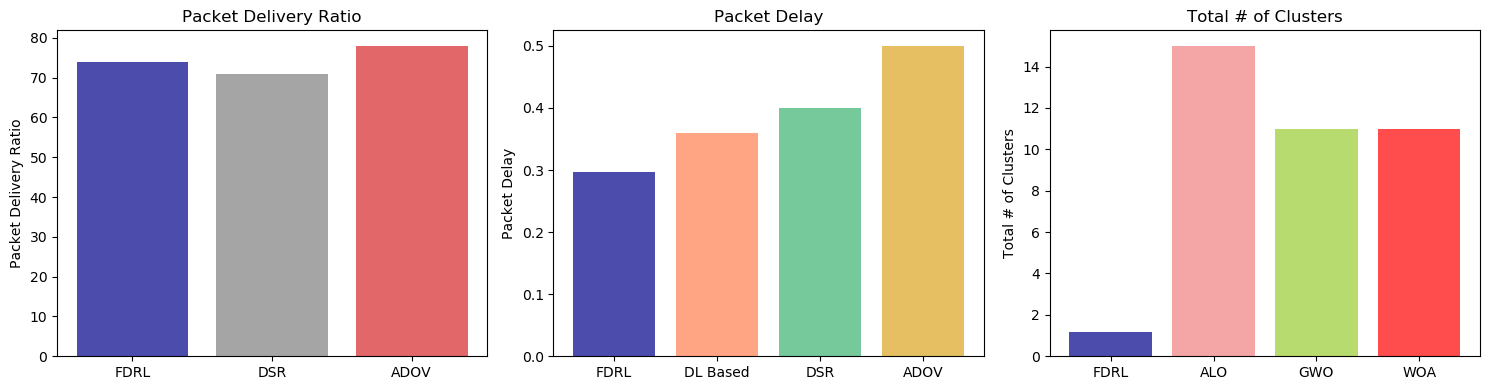

In [468]:
import matplotlib.pyplot as plt

def display_comparative_charts():
 # Metrics names for the x-axis labels
    metrics = ['Packet Delivery Ratio', 'Packet Delay', 'Total # of Clusters']

    # Columns in the DataFrame for each metric
    columns = ['avgPacketDelivery', 'avgPacketDelay', 'totalClusters']

    # Arbitrary categories for the x-axis

    # Create subplots with one row and three columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    ax1, ax2, ax3 = axes

    # Plot for Metric 1
    categories = ['FDRL', 'DSR', 'ADOV']
    mean_value1 = df[columns[0]].astype(float).mean()
    ax1.bar(categories, [mean_value1, 71, 78], color=['darkblue', 'tab:gray', 'tab:red'], alpha=0.7)
    ax1.set_title(metrics[0])
    ax1.set_ylabel(metrics[0])

    # Plot for Metric 2
    categories = ['FDRL', 'DL Based', 'DSR', 'ADOV']
    mean_value2 = df[columns[1]].astype(float).mean()
    ax2.bar(categories, [mean_value2, .36, .4, .5], color=['darkblue', 'coral', 'mediumseagreen', 'goldenrod'], alpha=0.7)
    ax2.set_title(metrics[1])
    ax2.set_ylabel(metrics[1])

    # Plot for Metric 3
    categories = ['FDRL', 'ALO', 'GWO', 'WOA']
    mean_value3 = df[columns[2]].astype(float).mean()
    ax3.bar(categories, [mean_value3, 15, 11, 11], color=['darkblue', 'lightcoral', 'yellowgreen', 'red'], alpha=0.7)
    ax3.set_title(metrics[2])
    ax3.set_ylabel(metrics[2])

    # Adjust layout
    plt.tight_layout()

    # Display the plots
    plt.show()

display_comparative_charts()
